# Param search results

In [21]:
%reset -f
%matplotlib inline
from db import make_session, d_models

GROUP = '0'

session = make_session()
rslts = session.query(d_models.SmlnRslt).filter_by(group=GROUP).order_by(
    d_models.SmlnRslt.success.desc()).limit(30)
session.close()

for rslt in rslts:
    print('ID: {}, SUCCESS: {},\nMETRICS: {}\n'.format(rslt.id, rslt.success, rslt.metrics))

ID: 374, SUCCESS: True,
METRICS: {'frac_spk_non_trj': 0.04326923076923077, 'avg_spk_ct_trj': 1.078125, 'success': True, 'frac_spk_trj': 0.851063829787234}

ID: 416, SUCCESS: True,
METRICS: {'frac_spk_non_trj': 0.08814102564102565, 'avg_spk_ct_trj': 1.5222222222222221, 'success': True, 'frac_spk_trj': 0.9574468085106383}

ID: 350, SUCCESS: True,
METRICS: {'frac_spk_non_trj': 0.3173076923076923, 'avg_spk_ct_trj': 1.0318471337579618, 'success': True, 'frac_spk_trj': 0.8351063829787234}

ID: 373, SUCCESS: True,
METRICS: {'frac_spk_non_trj': 0.07211538461538461, 'avg_spk_ct_trj': 1.058139534883721, 'success': True, 'frac_spk_trj': 0.9148936170212766}

ID: 390, SUCCESS: True,
METRICS: {'frac_spk_non_trj': 0.052884615384615384, 'avg_spk_ct_trj': 1.0131147540983607, 'success': True, 'frac_spk_trj': 0.8111702127659575}

ID: 413, SUCCESS: True,
METRICS: {'frac_spk_non_trj': 0.07532051282051282, 'avg_spk_ct_trj': 1.12, 'success': True, 'frac_spk_trj': 0.9308510638297872}

ID: 332, SUCCESS: True,


# Simulation verification

In [1]:
%reset -f
%matplotlib inline
from db import make_session, d_models
from seq_replay import plot, smln

SMLN_RSLT_ID = 335  #233

session = make_session()
smln_rslt = session.query(d_models.SmlnRslt).get(SMLN_RSLT_ID)
session.close()

p = smln_rslt.params
s_params = smln_rslt.s_params
apxn = smln_rslt.apxn

print('Running smln...')
rslt = smln.run(p, s_params, apxn)
print('Smln complete.')

Running smln...
Smln complete.


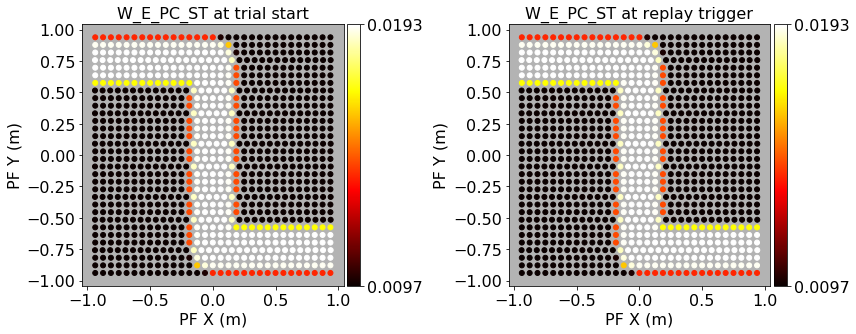

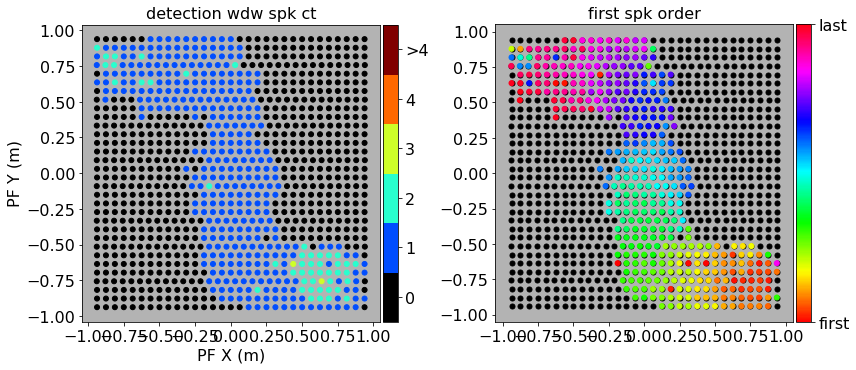

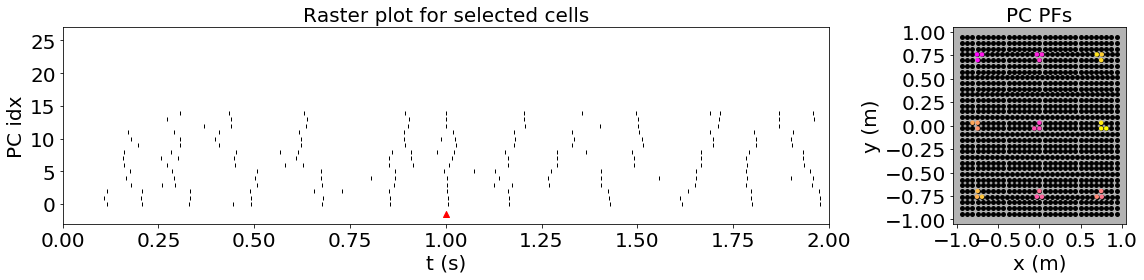

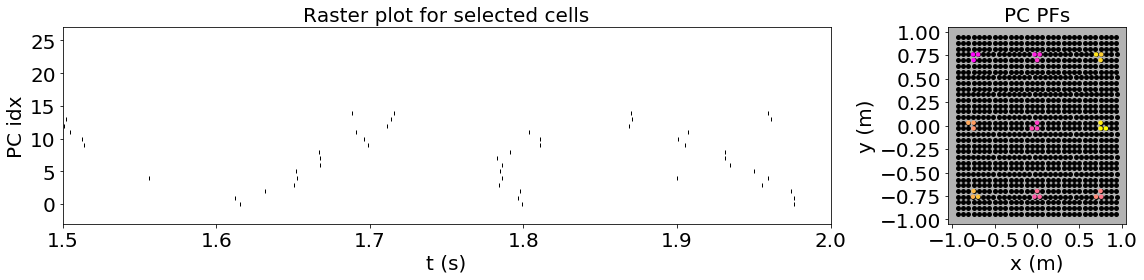

In [6]:
# make plots
plot.heat_maps(rslt, (1.82, 2));

plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    (-.75, 0), (-.75, -.75), (.75, .75), (.75, 0),  # non-trj
    ],
    nearest=3,
    epoch='replay');

plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    (-.75, 0), (-.75, -.75), (.75, .75), (.75, 0),  # non-trj
    ],
    nearest=3,
    epoch=(1.5, 2));

In [22]:
%reset -f
%matplotlib inline
from db import make_session, d_models
from seq_replay import plot, smln

SMLN_RSLT_ID = 418  #233

session = make_session()
smln_rslt = session.query(d_models.SmlnRslt).get(SMLN_RSLT_ID)
session.close()

p = smln_rslt.params
s_params = smln_rslt.s_params
apxn = smln_rslt.apxn

print('Running smln...')
rslt = smln.run(p, s_params, apxn)
print('Smln complete.')

Running smln...
Smln complete.


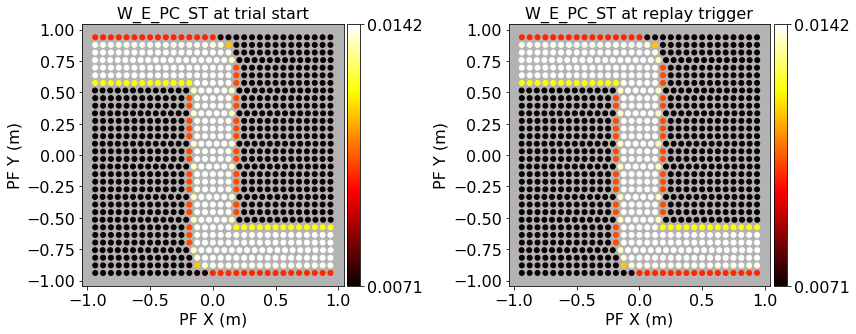

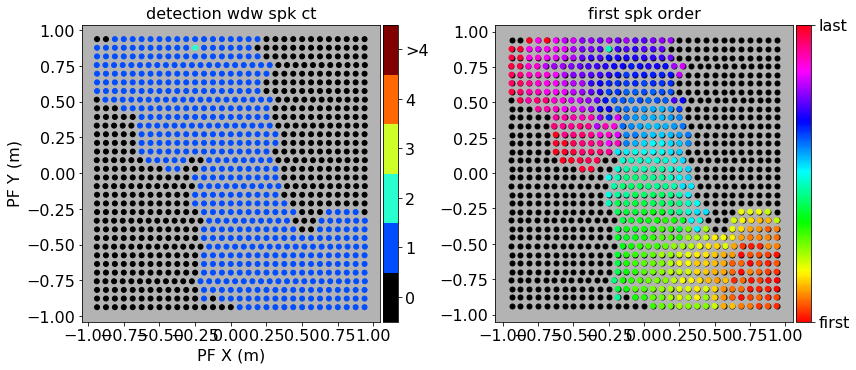

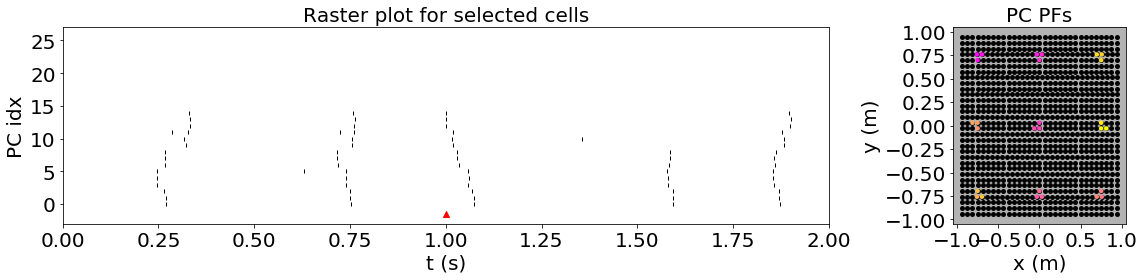

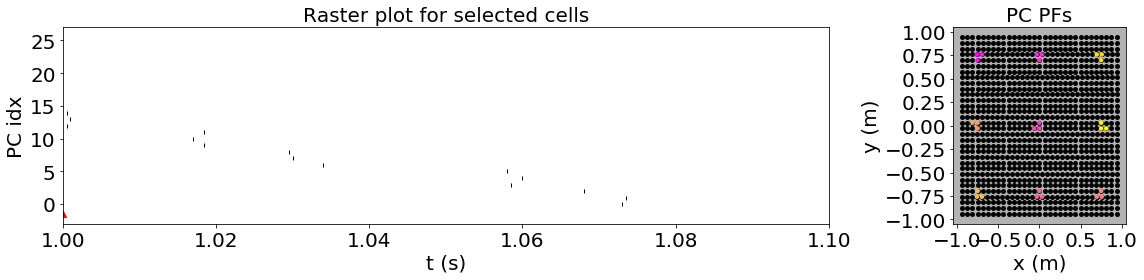

In [24]:
# make plots
plot.heat_maps(rslt);

plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    (-.75, 0), (-.75, -.75), (.75, .75), (.75, 0),  # non-trj
    ],
    nearest=3,
    epoch='replay');

plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    (-.75, 0), (-.75, -.75), (.75, .75), (.75, 0),  # non-trj
    ],
    nearest=3,
    epoch='wdw');

In [8]:
%reset -f
%matplotlib inline
from db import make_session, d_models
from seq_replay import plot, smln

SMLN_RSLT_ID = 390  #233

session = make_session()
smln_rslt = session.query(d_models.SmlnRslt).get(SMLN_RSLT_ID)
session.close()

p = smln_rslt.params
s_params = smln_rslt.s_params
apxn = smln_rslt.apxn

print('Running smln...')
rslt = smln.run(p, s_params, apxn)
print('Smln complete.')

Running smln...
Smln complete.


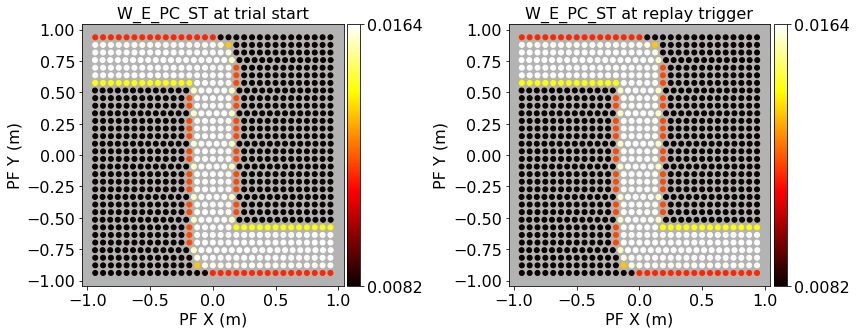

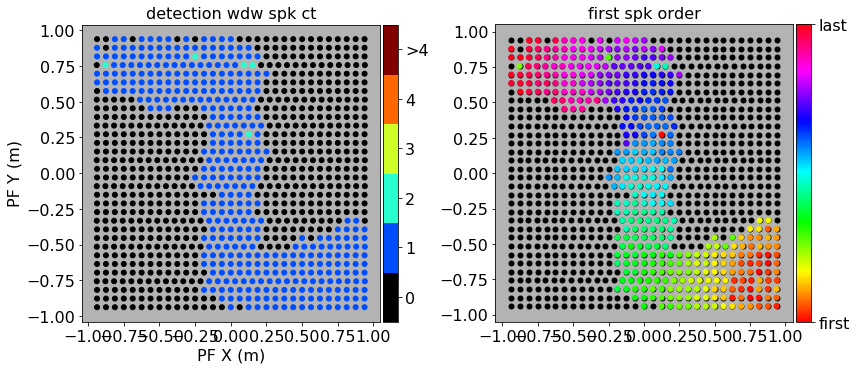

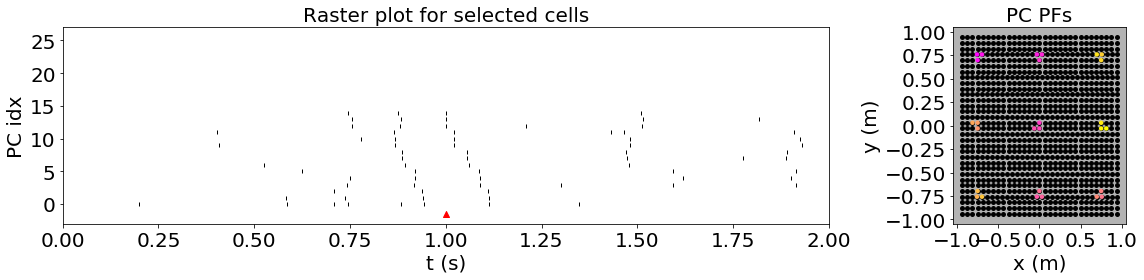

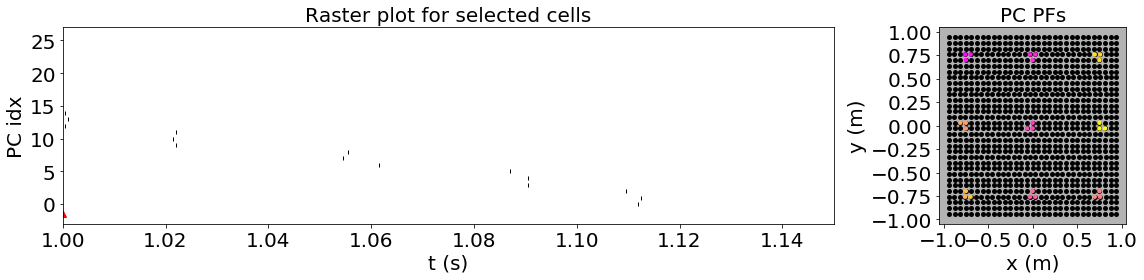

In [9]:
# make plots
plot.heat_maps(rslt, (1, 1.15));

plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    (-.75, 0), (-.75, -.75), (.75, .75), (.75, 0),  # non-trj
    ],
    nearest=3,
    epoch='replay');

plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    (-.75, 0), (-.75, -.75), (.75, .75), (.75, 0),  # non-trj
    ],
    nearest=3,
    epoch=(1, 1.15));

In [10]:
%reset -f
%matplotlib inline
from db import make_session, d_models
from seq_replay import plot, smln

SMLN_RSLT_ID = 390  #233

session = make_session()
smln_rslt = session.query(d_models.SmlnRslt).get(SMLN_RSLT_ID)
session.close()

p = smln_rslt.params
s_params = smln_rslt.s_params
s_params['RNG_SEED'] = 2
apxn = smln_rslt.apxn

print('Running smln...')
rslt = smln.run(p, s_params, apxn)
print('Smln complete.')

Running smln...
Smln complete.


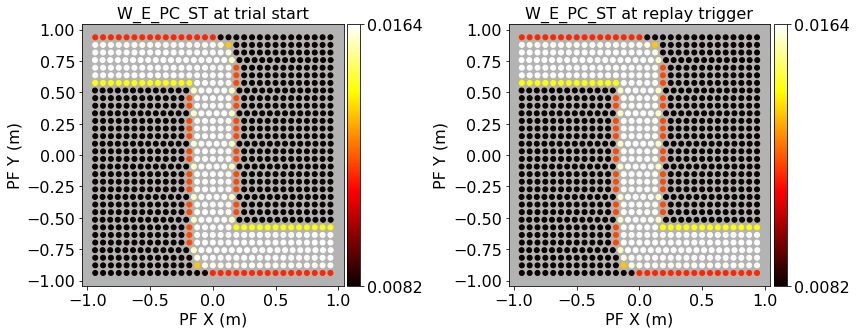

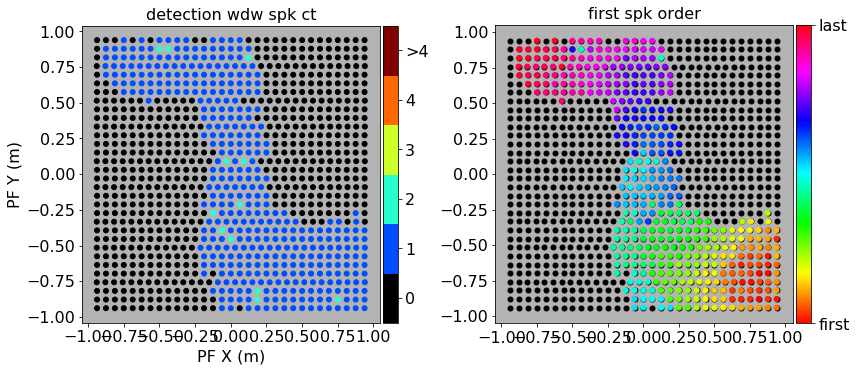

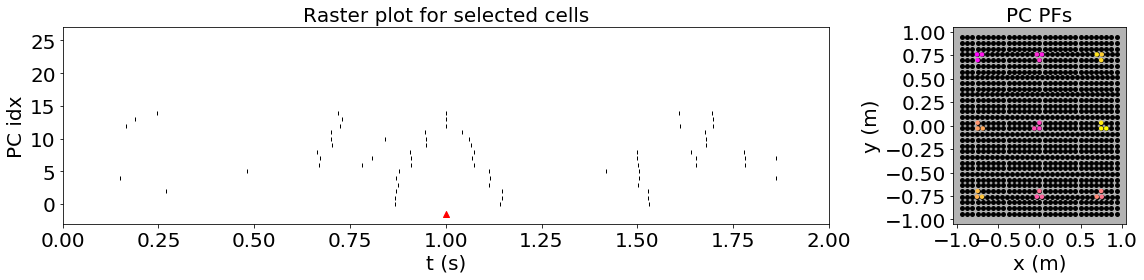

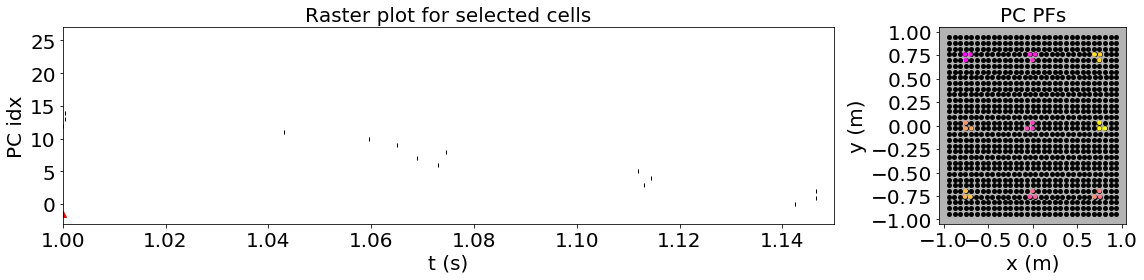

In [11]:
# make plots
plot.heat_maps(rslt, (1., 1.15));

plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    (-.75, 0), (-.75, -.75), (.75, .75), (.75, 0),  # non-trj
    ],
    nearest=3,
    epoch='replay');

plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    (-.75, 0), (-.75, -.75), (.75, .75), (.75, 0),  # non-trj
    ],
    nearest=3,
    epoch=(1, 1.15));